In [1]:
%matplotlib inline


==========================================================
Load CT slices and plot axial, sagittal and coronal images
==========================================================

This example illustrates loading multiple files, sorting them by slice
location, building a 3D image and reslicing it in different planes.

.. usage:

   reslice.py <glob>
   where <glob> refers to a set of DICOM image files.

   Example: python reslice.py "*.dcm". The quotes are needed to protect
   the glob from your system and leave it for the script.

.. note:

   Uses numpy and matplotlib.


In [2]:
import os
PathDicom = "/data/Pat1/CT_scan/DICOM/PA000001/ST000001/SE000005"
lstFilesDCM = []  # create an empty list
count = 0
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        print(filename)
        count+=1
count

IM000737
IM000764
IM000061
IM000358
IM000141
IM000479
IM000648
IM000490
IM000640
IM000672
IM000688
IM000333
IM000387
IM000057
IM000053
IM000219
IM000516
IM000310
IM000685
IM000171
IM000497
IM000776
IM000743
IM000105
IM000569
IM000391
IM000397
IM000523
IM000185
IM000222
IM000011
IM000267
IM000642
IM000020
IM000560
IM000580
IM000293
IM000753
IM000163
IM000429
IM000352
IM000405
IM000395
IM000150
IM000257
IM000039
IM000748
IM000157
IM000711
IM000164
IM000588
IM000537
IM000461
IM000341
IM000145
IM000319
IM000309
IM000323
IM000217
IM000483
IM000767
IM000570
IM000068
IM000092
IM000360
IM000027
IM000650
IM000477
IM000253
IM000447
IM000332
IM000304
IM000513
IM000129
IM000084
IM000354
IM000356
IM000707
IM000093
IM000576
IM000368
IM000234
IM000525
IM000200
IM000411
IM000340
IM000128
IM000038
IM000292
IM000756
IM000607
IM000285
IM000703
IM000186
IM000773
IM000307
IM000667
IM000408
IM000299
IM000135
IM000232
IM000728
IM000717
IM000377
IM000380
IM000224
IM000515
IM000121
IM000083
IM000184
IM000262
I

786

785


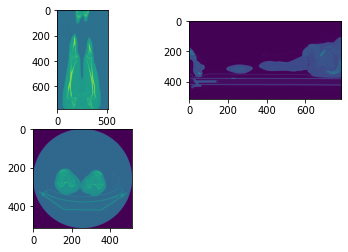

In [3]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import sys
import glob

# load the DICOM files
import os
PathDicom = "/data/Pat1/CT_scan/DICOM/PA000001/ST000001/SE000005"
lstFilesDCM = []  # create an empty list
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".zip" not in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))
# print(len(lstFilesDCM))
files = []
# print('glob: {}'.format(sys.argv[1]))
for fname in lstFilesDCM:
#     print("loading: {}".format(fname))
    files.append(pydicom.dcmread(fname))

# print("file count: {}".format(len(files)))

# skip files with no SliceLocation (eg scout views)
slices = []
skipcount = 0
for f in files:
    if hasattr(f, 'SliceLocation'):
        slices.append(f)
    else:
        skipcount = skipcount + 1

# print("skipped, no SliceLocation: {}".format(skipcount))

# ensure they are in the correct order
slices = sorted(slices, key=lambda s: s.SliceLocation)
print(len(slices))

# pixel aspects, assuming all slices are the same
ps = slices[0].PixelSpacing
ss = slices[0].SliceThickness
ax_aspect = ps[1]/ps[0]
sag_aspect = ps[1]/ss
cor_aspect = ss/ps[0]

# create 3D array
img_shape = list(slices[0].pixel_array.shape)
img_shape.append(len(slices))
img3d = np.zeros(img_shape)

# fill 3D array with the images from the files
for i, s in enumerate(slices):
    img2d = s.pixel_array
    img3d[:, :, i] = img2d

# plot 3 orthogonal slices
a1 = plt.subplot(2, 2, 3)
plt.imshow(img3d[:, :, img_shape[2]//2])
a1.set_aspect(ax_aspect)

a2 = plt.subplot(2, 2, 2)
plt.imshow(img3d[:, img_shape[1]//2, :])
a2.set_aspect(sag_aspect)

a3 = plt.subplot(2, 2, 1)
plt.imshow(img3d[img_shape[0]//2, :, :].T)
a3.set_aspect(cor_aspect)

plt.show()

In [4]:
# np.average(img3d.ravel())

In [5]:
import copy
# # plot 3 orthogonal slices
# a1 = plt.subplot(2, 2, 1)
# my_array = copy.deepcopy(img3d[:, :, img_shape[2]//2])
# my_array[my_array <= 1500] = 0
# plt.imshow(my_array)

# a1.set_aspect(ax_aspect)
# a2 = plt.subplot(2, 2, 2)
# my_array = copy.deepcopy(img3d[:, :, img_shape[2]//2])
# my_array[my_array <= 2000] = 0
# plt.imshow(my_array)

# a2.set_aspect(ax_aspect)


In [6]:
# a3 = plt.subplot(2, 2, 1)
# my_array = copy.deepcopy(img3d[img_shape[0]//2, :, :].T)
# a3.set_aspect(cor_aspect)
# my_array[my_array <= 1500] = 0
# plt.imshow(my_array)
# a3.set_aspect(ax_aspect)

# a2 = plt.subplot(2, 2, 2)
# my_array = copy.deepcopy(img3d[img_shape[0]//2, :, :].T)
# a3.set_aspect(cor_aspect)
# my_array[my_array <= 2000] = 0
# plt.imshow(my_array)
# a2.set_aspect(ax_aspect)


In [7]:
array_3d = copy.deepcopy(img3d)
array_3d[array_3d <= 1500] = 0


In [8]:
# x, y, z = [], [], []

# for i, img2d in enumerate(img3d):
#     for j, img1d in enumerate(img2d):
#         for k, pixal in enumerate(img1d):
#             if pixal > 1500:
#                 x.append(int(i))
#                 y.append(int(j))
#                 z.append(int(k))

# x = np.array(x)
# y = np.array(y)
# z = np.array(z)

In [9]:
# import ipyvolume as ipv
# ipv.figure()
# ipv.scatter(x, y, z, marker='sphere')

# ipv.save('bone.html')


In [18]:
from skimage import measure, morphology
from skimage.morphology import ball, binary_closing
from skimage.measure import label, regionprops
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


def plot_3d(p, label=None):

    # Position the scan upright, 
    # so the head of the patient would be at the top facing the   
    # camera
    # p = image  # .transpose(2,1,0)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    # Fancy indexing: `verts[faces]` to generate a collection of    
    # triangles
    if label is not None:
        verts, faces, _, _ = measure.marching_cubes_lewiner(label)
        mesh = Poly3DCollection(verts[faces], alpha=0.20)
        face_color = [0.45, 0.45, 0.75]
        mesh.set_facecolor(face_color)
        ax.add_collection3d(mesh)

    verts, faces, _, _ = measure.marching_cubes_lewiner(p)
    mesh = Poly3DCollection(verts[faces], alpha=0.70)
    face_color = [0.45, 0.45, 0.75]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)
    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])
    plt.show()

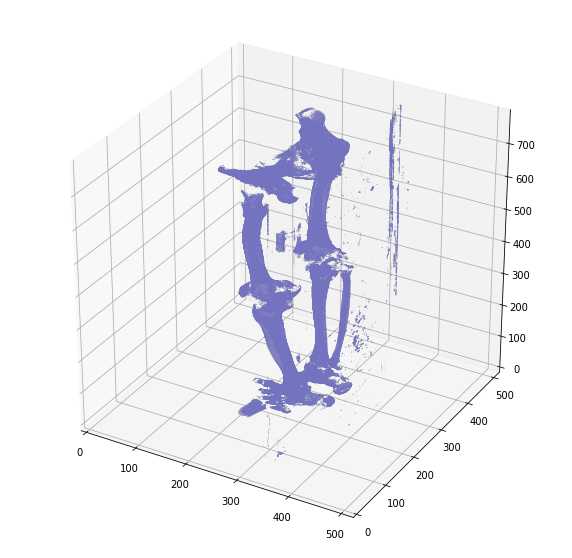

In [11]:
plot_3d(array_3d)

In [20]:
def recenter(csv_data):
    csv_data['x'] = csv_data['x'] + 256
    csv_data['y'] = csv_data['y'] + 256
    csv_data['z'] = csv_data['z'] + 256
    return csv_data

path_csv = '/data/Pat1/POD_JR_9060K_Landmarks_femur.csv'
import pandas as pd
data = pd.read_csv(path_csv, names=["Name", "x", "y", "z"])
data = recenter(data)
data

,Name,x,y,z
0,PCLOrigin,126.793300,280.939700,569.894100
1,femoralCenter,113.265800,259.149500,546.903100
2,greaterTrochanter,53.227700,267.263400,962.580800
3,hipCenter,104.847400,240.719100,959.975400
4,lateralCondyle,90.977900,269.863500,539.416500
5,lateralEpicondyle,71.690300,276.546600,564.459000
6,lateralPosteriorCondyle,91.063600,299.374100,561.026700
7,medialCondyle,143.109100,269.664600,539.387900
8,medialEpicondyle,158.638492,262.533736,566.837342
9,medialPosteriorCondyle,143.780700,297.472500,564.282800


In [13]:
for index, row in data.iterrows():
    print(row['x'], '-----', row['y'], '-----', row['z'])


-73.2067 ----- 24.9397 ----- 369.8941
-86.7342 ----- 3.1495 ----- 346.9031
-146.7723 ----- 11.2634 ----- 762.5808
-95.1526 ----- -15.2809 ----- 759.9754
-109.0221 ----- 13.8635 ----- 339.4165
-128.3097 ----- 20.5466 ----- 364.459
-108.9364 ----- 43.3741 ----- 361.0267
-56.8909 ----- 13.6646 ----- 339.3879
-41.3615075972679 ----- 6.53373591072683 ----- 366.837341836535
-56.2193 ----- 41.4725 ----- 364.2828
-41.4560682662727 ----- 11.910183748685 ----- 363.50762392606003
-116.0186 ----- -11.3743 ----- 560.6184
-89.228 ----- -13.1569 ----- 356.392


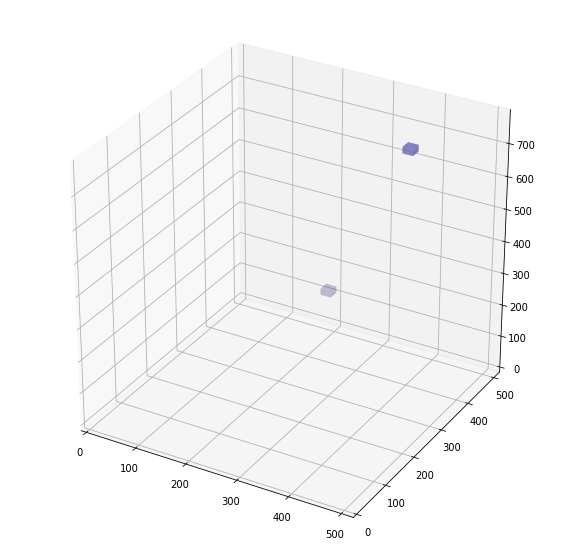

In [19]:
mark_img = np.zeros(img_shape)
x = np.zeros(img_shape)

cude_size = 10
for i in range(-cude_size, cude_size):
    for j in range(-cude_size, cude_size):
        for k in range(-cude_size, cude_size):
            mark_img[i+400, j+400, 720+k] = 5200
            x[i+300, j+300, 320+k] = 5200

plot_3d(mark_img, x)

In [ ]:
# for index, row in df.iterrows():
#     print(row['x'], row['y'])


In [ ]:
# x = np.linspace(0, 512, 100)
# y = np.sin(x)*x
# print(len(x),max(y))